# 1 - Imports

In [ ]:
!pip install -U -q PyDrive 
  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px


#For my authentication in Google Drive
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

# 2 - Authenticaion and Table Viewing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
salaries = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv') 
display(salaries)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


#3 - Univariate Analysis

In [ ]:
px.pie(salaries,names='experience_level',title='Experience Level')

In [ ]:
grouped_type = salaries['employment_type'].value_counts()
px.bar(x = grouped_type.index, y = grouped_type.values,text=grouped_type.values,title='Employment Type').update_traces(width=0.5).update_layout(xaxis_title='Employment Type',yaxis_title = 'Count')

In [ ]:
top_job_title = salaries['job_title'].value_counts()[:15]
px.bar(x=top_job_title.index,y=top_job_title.values,title='Top 15 Job Titles',text=top_job_title.values).update_layout(xaxis_title='Job Title',yaxis_title='Count')

#4 - Bivariate Analysis

# 4.1 - Salary Analysis

# 4.1.1 - Salary By Company Size

[Text(0, 0.5, 'Mean Salary in USD'), Text(0.5, 0, 'Company Size')]

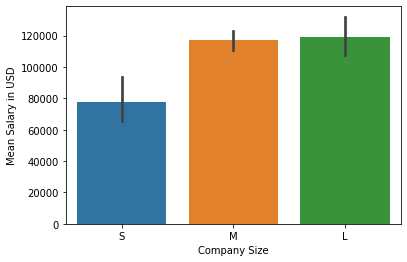

In [ ]:
sns.barplot(y='salary_in_usd', x='company_size', data=salaries,order=['S','M','L']).set( xlabel = "Company Size", ylabel = "Mean Salary in USD")

# 4.1.2 - Salary By Experience Level

Salary By Experience Level and Work Year

In [ ]:
px.scatter(salaries, y = 'salary_in_usd',x='experience_level',color='experience_level',hover_name='experience_level',animation_frame='work_year',color_discrete_sequence=px.colors.qualitative.Alphabet,size='salary_in_usd').update_layout(xaxis_title='Experience Level',yaxis_title='Salary In USD')

# 4.1.3 - Salary by Job Title

Here is the 20 highest salaries by job title

In [ ]:
salary_job = salaries.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], color = salary_job['salary_in_usd'])
fig.update_layout(xaxis_title='Job Title',yaxis_title='Mean Salary')
fig.update_layout(barmode='relative',xaxis_tickangle=-45)

# 5 - Outliers

In [ ]:
print('Média: ',np.mean(salaries.salary_in_usd))

Média:  112297.86985172982


In [ ]:
print('Desvio padrão: ',np.std(salaries.salary_in_usd))

Desvio padrão:  70898.78617574446


In [ ]:
print('Coeficiente de variação: ',np.std(salaries.salary_in_usd)/np.mean(salaries.salary_in_usd))

Coeficiente de variação:  0.6313457794823198


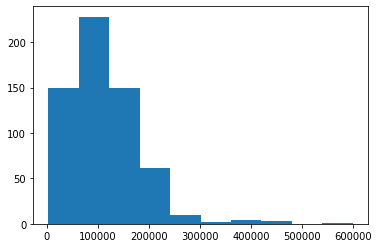

In [ ]:
plt.hist(salaries.salary_in_usd,10,rwidth= 1)
plt.show()

In [ ]:
px.box(salaries, x="work_year", y="salary_in_usd")